# Family and Children's Services Crisis Project by DataCampers
### Objective 2: Analyze trends in call content by looking for which issues are most frequent and what is the average count of issues per call.
- *For the second objective, the columns that contain the information about the documented issues are those that begin with CRISIS Issues. When calls come in, call takers use a form to indicate the various issues the individual is experiencing.*
- *If an individual is experiencing multiple issues, the issues can be grouped together into a single cell, which makes understanding individual issues difficult. For this project you will parse the data from the different CRISIS Issues columns to allow deeper investigation of each individual issue.*

### To do: CRISIS Issues per call (partitioned by CRISIS Issue column) calculated, need to chart these values

## Self EDA

#### Read in the relevant data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests as re

In [2]:
df1 = pd.read_excel('../data/NSSCrisisv_1.xlsx') # 2020-2021
df2 = pd.read_excel('../data/NSSCrisisv_2.xlsx') # 2022
# df_2020 = pd.read_excel('../data/2020callcenter.xlsx')
# df_2021 = pd.read_excel('../data/2021callcenter.xlsx')
# df_2022 = pd.read_excel('../data/2022callcenter.xlsx')

In [3]:
# Rob: Change name of CRISIS Subjective in v2 to CRISIS Issues to match v1
labels = list()
for col in df2.columns:
    labels.append(col.replace('Subjective', 'Issues'))
df2.columns = labels

In [4]:
# Rob: Drops columns that contain only NaN
df1.dropna(how='all', axis=1, inplace=True)
df2.dropna(how='all', axis=1, inplace=True)

In [5]:
# Rob: Drop columns whose entire values are 98% NaN
# pct_null = df1.isnull().sum() / len(df1)
# missing_features = pct_null[pct_null > 0.98].index
# df1.drop(missing_features, axis=1, inplace=True)

In [6]:
# pct_null = df1.isnull().sum() / len(df1)
# missing_features = pct_null[pct_null > 0.98].index
# df2.drop(missing_features, axis=1, inplace=True)

In [ ]:
# Maggie: Find the columns that are the same in both dfs
samecolumnsdf = pd.DataFrame(df1.columns.intersection(df2.columns))
samecolumnsdf

## Group EDA
We are using these columns in addition to the CRISIS Issues columns:
- CallReportNum, CallDateAndTimeStart, CallDateAndTimeEnd, CallLength, CallerNum

In [8]:
# Rob: Loop that grabs columns we want and puts it into one df
filter_col1 = [col for col in df1 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df1_ci = df1[filter_col1]

In [9]:
# Rob: Loop that grabs columns we want and puts it into one df
filter_col2 = [col for col in df2 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df2_ci = df2[filter_col2]

### THIS IS THE MASTER DATAFRAME

In [ ]:
all_ci = pd.concat([df1_ci, df2_ci])
all_ci

Refresher: ..... **what is the average count of issues per call.**

## ROB'S CODE TO COUNT ISSUES
- I am using this to find the issue count of each cell corresponding to that issue category. Then we can find the average count of issues per call (eg. PARTITION BY all CRISIS Issues) and the average count of each category issue per call (eg. PARTITION BY CRISIS Issue - Abusive Behavior, etc).
- **Run each section from the top to refresh the variables!!**
- lens show how many of those category rows exist (eg. 2505 Abusive Behavior rows out of 63,254)
- sums show total count of the issues count column for that category, will always be >= to lens
- Need to divide these sums by 63,254 to get the avg number of issues for that category per call

1. CRISIS Issues - Abusive Behavior

In [11]:
ci_counts = all_ci['CRISIS Issues - Abusive Behavior'].notnull()

In [12]:
ci_counts = all_ci[ci_counts]

In [13]:
count = []

for x in ci_counts['CRISIS Issues - Abusive Behavior']:
    counter = x.count(";")+1
    count.append(counter)

In [14]:
ci_counts['Issues_Count_AB'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/4004364910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_AB'] = count


In [15]:
len(ci_counts.index)

2505

In [16]:
ci_counts['Issues_Count_AB'].sum()

3656

In [17]:
a=3656/63254 # 0.06 Abusive behavior issues per call

2. CRISIS Issues - Emotional State

In [18]:
ci_counts = all_ci['CRISIS Issues - Emotional State'].notnull()

In [19]:
ci_counts = all_ci[ci_counts]

In [20]:
count = []

for x in ci_counts['CRISIS Issues - Emotional State']:
    counter = x.count(";")+1
    count.append(counter)

In [21]:
ci_counts['Issues_Count_ES'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/4273064899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_ES'] = count


In [22]:
len(ci_counts.index)

42713

In [23]:
ci_counts['Issues_Count_ES'].sum()

98606

In [24]:
b=98606/63254 # 1.56 Emotional state issues per call

3. CRISIS Issues - Financial/Basic Needs

In [25]:
ci_counts = all_ci['CRISIS Issues - Financial/Basic Needs'].notnull()

In [26]:
ci_counts = all_ci[ci_counts]

In [27]:
count = []

for x in ci_counts['CRISIS Issues - Financial/Basic Needs']:
    counter = x.count(";")+1
    count.append(counter)

In [28]:
ci_counts['Issues_Count_FBN'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/1554597162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_FBN'] = count


In [29]:
len(ci_counts.index)

2515

In [30]:
ci_counts['Issues_Count_FBN'].sum()

3523

In [31]:
c=3523/63254 # 0.06 Financial/Basic Needs issues per call

4. CRISIS Issues - Health/Physical

In [32]:
ci_counts = all_ci['CRISIS Issues - Health/Physical'].notnull()

In [33]:
ci_counts = all_ci[ci_counts]

In [34]:
count = []

for x in ci_counts['CRISIS Issues - Health/Physical']:
    counter = x.count(";")+1
    count.append(counter)

In [35]:
ci_counts['Issues_Count_HP'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/3637456233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_HP'] = count


In [36]:
len(ci_counts.index)

5736

In [37]:
ci_counts['Issues_Count_HP'].sum()

7594

In [38]:
d=7594/63254 # 0.12 Health/Physical issues per call

5. CRISIS Issues - Homicide

In [39]:
ci_counts = all_ci['CRISIS Issues - Homicide'].notnull()

In [40]:
ci_counts = all_ci[ci_counts]

In [41]:
count = []

for x in ci_counts['CRISIS Issues - Homicide']:
    counter = x.count(";")+1
    count.append(counter)

In [42]:
ci_counts['Issues_Count_Hom'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/819893445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Hom'] = count


In [43]:
len(ci_counts.index)

58

In [44]:
ci_counts['Issues_Count_Hom'].sum()

72

In [45]:
e=72/63254 # 0.001 Homicide issues per call

6. CRISIS Issues - Information or Services Needed

In [46]:
ci_counts = all_ci['CRISIS Issues - Information or Services Needed'].notnull()

In [47]:
ci_counts = all_ci[ci_counts]

In [48]:
count = []

for x in ci_counts['CRISIS Issues - Information or Services Needed']:
    counter = x.count(";")+1
    count.append(counter)

In [49]:
ci_counts['Issues_Count_ISN'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/137537728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_ISN'] = count


In [50]:
len(ci_counts.index)

2041

In [51]:
ci_counts['Issues_Count_ISN'].sum()

2541

In [52]:
f=2541/63254 # 0.04 Information or Services Needed issues per call

7. CRISIS Issues - Mental Health

In [53]:
ci_counts = all_ci['CRISIS Issues - Mental Health'].notnull()

In [54]:
ci_counts = all_ci[ci_counts]

In [55]:
count = []

for x in ci_counts['CRISIS Issues - Mental Health']:
    counter = x.count(";")+1
    count.append(counter)

In [56]:
ci_counts['Issues_Count_MH'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/928731095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_MH'] = count


In [57]:
len(ci_counts.index)

22253

In [58]:
ci_counts['Issues_Count_MH'].sum()

41546

In [59]:
g=41546/63254 # 0.66 Mental Health issues per call

8. CRISIS Issues - No Issue Call

In [60]:
ci_counts = all_ci['CRISIS Issues - No Issue Call'].notnull()

In [61]:
ci_counts = all_ci[ci_counts]

In [62]:
count = []

for x in ci_counts['CRISIS Issues - No Issue Call']:
    counter = x.count(";")+1
    count.append(counter)

In [63]:
ci_counts['Issues_Count_NIC'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/12750776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_NIC'] = count


In [64]:
len(ci_counts.index)

1519

In [65]:
ci_counts['Issues_Count_NIC'].sum()

1521

In [66]:
h=1521/63254 # 0.02 No Issue Call issues per call

9. CRISIS Issues - Other Description

In [67]:
ci_counts = all_ci['CRISIS Issues - Other Description'].notnull()

In [68]:
ci_counts = all_ci[ci_counts]

In [69]:
count = []

for x in ci_counts['CRISIS Issues - Other Description']:
    counter = x.count(";")+1
    count.append(counter)

In [70]:
ci_counts['Issues_Count_Other'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/2871519774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Other'] = count


In [71]:
len(ci_counts.index)

3407

In [72]:
ci_counts['Issues_Count_Other'].sum()

3477

In [73]:
i=3477/63254 # 0.05 Other Description issues per call

10. CRISIS Issues - Relationships

In [74]:
ci_counts = all_ci['CRISIS Issues - Relationships'].notnull()

In [75]:
ci_counts = all_ci[ci_counts]

In [76]:
count = []

for x in ci_counts['CRISIS Issues - Relationships']:
    counter = x.count(";")+1
    count.append(counter)

In [77]:
ci_counts['Issues_Count_Rel'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/3899193224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Rel'] = count


In [78]:
len(ci_counts.index)

27843

In [79]:
ci_counts['Issues_Count_Rel'].sum()

61546

In [80]:
j=61546/63254 # 0.97 Relationships issues per call

11. CRISIS Issues - Substances

In [81]:
ci_counts = all_ci['CRISIS Issues - Substances'].notnull()

In [82]:
ci_counts = all_ci[ci_counts]

In [83]:
count = []

for x in ci_counts['CRISIS Issues - Substances']:
    counter = x.count(";")+1
    count.append(counter)

In [84]:
ci_counts['Issues_Count_Sub'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/4281212156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Sub'] = count


In [85]:
len(ci_counts.index)

3081

In [86]:
ci_counts['Issues_Count_Sub'].sum()

3901

In [87]:
k=3901/63254 # 0.06 Substances issues per call

12. CRISIS Issues - Suicide

In [88]:
ci_counts = all_ci['CRISIS Issues - Suicide'].notnull()

In [89]:
ci_counts = all_ci[ci_counts]

In [90]:
count = []

for x in ci_counts['CRISIS Issues - Suicide']:
    counter = x.count(";")+1
    count.append(counter)

In [91]:
ci_counts['Issues_Count_Sui'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/502423700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_Sui'] = count


In [92]:
len(ci_counts.index)

5151

In [93]:
ci_counts['Issues_Count_Sui'].sum()

6514

In [94]:
l=6514/63254 # 0.10 Suicide issues per call

13. CRISIS Issues - No presenting problems

In [95]:
ci_counts = all_ci['CRISIS Issues - No presenting problems'].notnull()

In [96]:
ci_counts = all_ci[ci_counts]

In [97]:
count = []

for x in ci_counts['CRISIS Issues - No presenting problems']:
    counter = x.count(";")+1
    count.append(counter)

In [98]:
ci_counts['Issues_Count_NPP'] = count

C:\Users\Jasmine\AppData\Local\Temp/ipykernel_4632/2370888896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_counts['Issues_Count_NPP'] = count


In [99]:
len(ci_counts.index)

234

In [100]:
ci_counts['Issues_Count_NPP'].sum()

234

In [101]:
m=234/63254 # 0.004 No presenting problems issues per call

Making a DataFrame to plot number of CRISIS issues per call by category

In [ ]:
CRISIS_Issues = ['Abusive Behavior', 'Emotional State','Financial/Basic Needs','Health/Physical','Homicide','Information or Services Needed','Mental Health','No Issue Call','Other Description','Relationships','Substances','Suicide','No Presenting Problems']
issue_count_by_col = [a,b,c,d,e,f,g,h,i,j,k,l,m]

# icbc = issue count by category
icbc = pd.DataFrame(list(zip(CRISIS_Issues, issue_count_by_col)),
                   columns=['Issue_Category','Number_of_Issues_Per_Call'])
icbc_sorted = icbc.sort_values('Number_of_Issues_Per_Call', ascending=True)
icbc_sorted

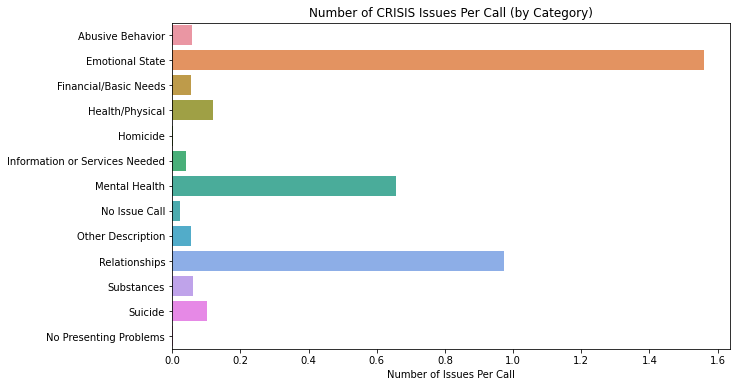

In [186]:
plt.figure(figsize=(10, 6))
sns.barplot(y=CRISIS_Issues,
            x=issue_count_by_col,
            data=icbc_sorted)
plt.xlabel('Number of Issues Per Call')
#plt.ylabel('CRISIS Issue Category')
plt.title('Number of CRISIS Issues Per Call (by Category)');
# Tried to sort desc but it didn't work

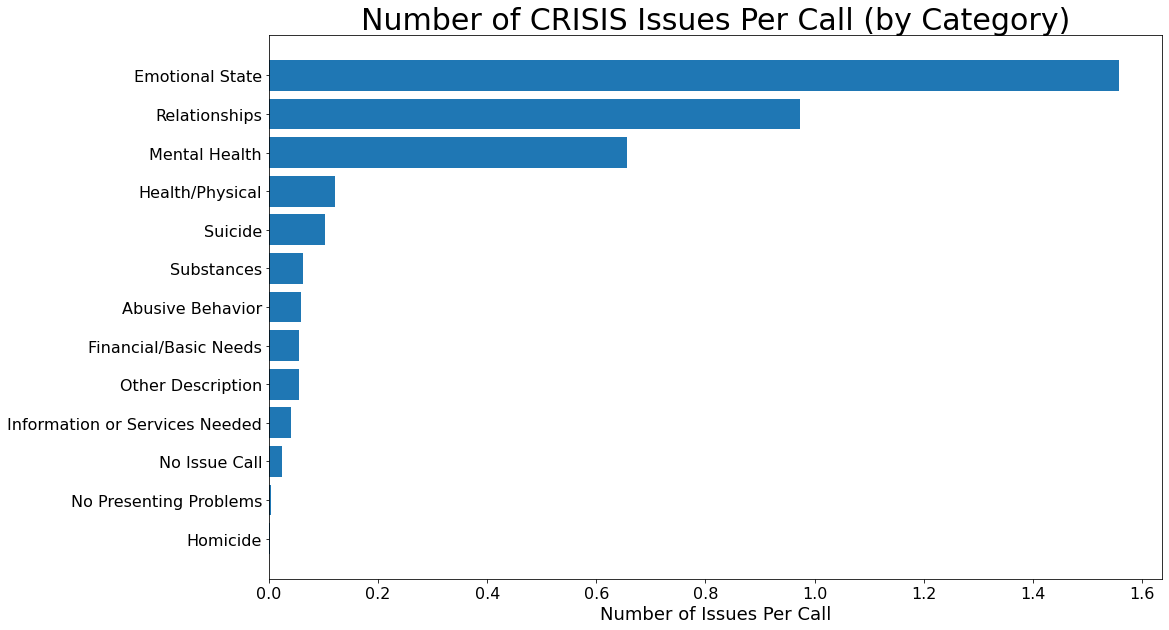

In [187]:
plt.figure(figsize=(16, 10))
plt.barh(icbc_sorted.Issue_Category, icbc_sorted.Number_of_Issues_Per_Call)
plt.xticks(rotation = 0, fontsize=16)
plt.xlabel('Number of Issues Per Call', fontsize=18)
#plt.ylabel('CRISIS Issue Category', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Number of CRISIS Issues Per Call (by Category)', fontsize=30);

## COUNT OF ISSUES (for CRISIS columns only) = checks out with Rob's .sum()

In [103]:
# Total number of abusive behavior issues
ab = all_ci['CRISIS Issues - Abusive Behavior'].str.count(';')+1
ab.sum()

3656.0

## Below are the total number of issues per CRISIS column (13)

In [104]:
# Total number of abusive behavior issues
ab = all_ci['CRISIS Issues - Abusive Behavior'].str.count(';')+1
total_ab = ab.sum()
total_ab

3656.0

In [105]:
# Total number of emotional state issues
es = all_ci['CRISIS Issues - Emotional State'].str.count(';')+1
total_es = es.sum()
total_es

98606.0

In [106]:
# Total number of Financial/Basic Needs issues
fbn = all_ci['CRISIS Issues - Financial/Basic Needs'].str.count(';')+1
total_fbn = fbn.sum()
total_fbn

3523.0

In [107]:
# Total number of Health/Physical issues
hp = all_ci['CRISIS Issues - Health/Physical'].str.count(';')+1
total_hp = hp.sum()
total_hp

7594.0

In [108]:
# Total number of Health/Physical issues
hom = all_ci['CRISIS Issues - Homicide'].str.count(';')+1
total_hom = hom.sum()
total_hom

72.0

In [109]:
# Total number of Information or Services Needed issues
isn = all_ci['CRISIS Issues - Information or Services Needed'].str.count(';')+1
total_isn = isn.sum()
total_isn

2541.0

In [110]:
# Total number of mental health issues
mh = all_ci['CRISIS Issues - Mental Health'].str.count(';')+1
total_mh = mh.sum()
total_mh

41546.0

In [111]:
# Total number of No Issue Call issues
nic = all_ci['CRISIS Issues - No Issue Call'].str.count(';')+1
total_nic = nic.sum()
total_nic

1521.0

In [112]:
# Total number of Other Description issues
od = all_ci['CRISIS Issues - Other Description'].str.count(';')+1
total_od = od.sum()
total_od

3477.0

In [113]:
# Total number of Relationships issues
rel = all_ci['CRISIS Issues - Relationships'].str.count(';')+1
total_rel = rel.sum()
total_rel

61546.0

In [114]:
# Total number of Substances issues
sub = all_ci['CRISIS Issues - Substances'].str.count(';')+1
total_sub = sub.sum()
total_sub

3901.0

In [115]:
# Total number of Suicide issues
sui = all_ci['CRISIS Issues - Suicide'].str.count(';')+1
total_sui = sui.sum()
total_sui

6514.0

In [116]:
# Total number of No presenting problems issues
npp = all_ci['CRISIS Issues - No presenting problems'].str.count(';')+1
total_npp = npp.sum()
total_npp

234.0

In [ ]:
# Making the DataFrame
num_issues_list = [total_ab, total_es, total_fbn, total_hp, total_hom, total_isn, total_mh, total_nic, total_od, total_rel, total_sub, total_sui, total_npp]
cri_issues_list = ['Abusive Behavior', 'Emotional State', 'Financial/Basic Needs', 'Health/Physical', 'Homicide', 'Info/Service Needed', 'Mental Health', 'No Issue', 'Other', 'Relationships', 'Substances', 'Suicide', 'No Presenting Problems']
issue_count_df = pd.DataFrame(list(zip(cri_issues_list, num_issues_list)),
    columns =['CRISIS_Issue', 'Number_of_Issues'])
issue_count_df

In [ ]:
issue_count_df = issue_count_df.sort_values('Number_of_Issues', ascending=True)
issue_count_df

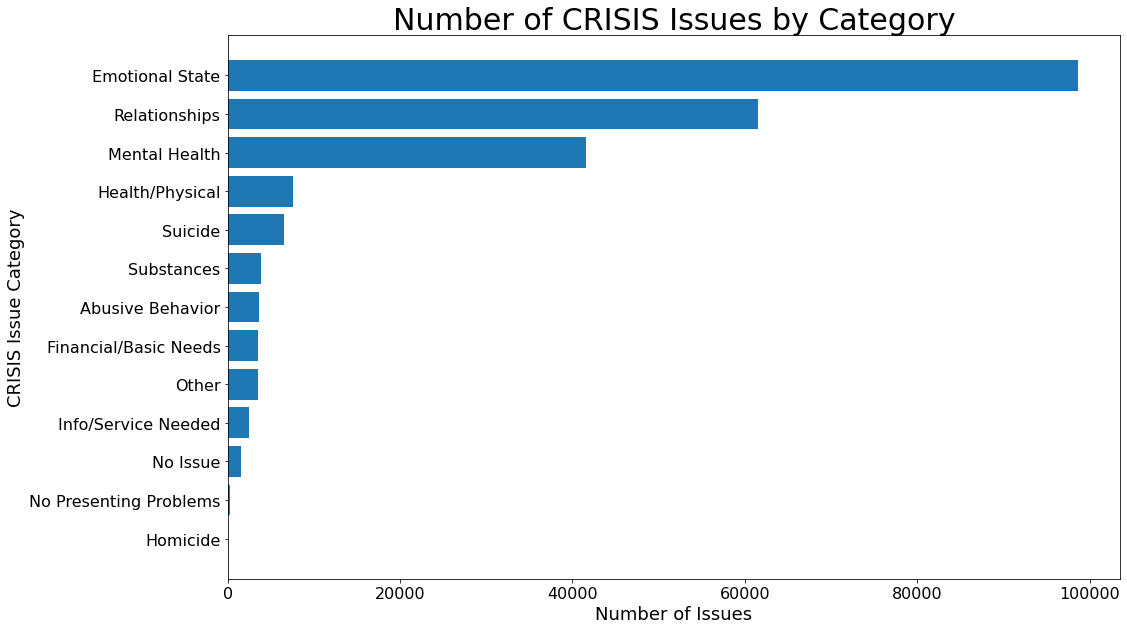

In [183]:
plt.figure(figsize=(16, 10))
plt.barh(issue_count_df.CRISIS_Issue, issue_count_df.Number_of_Issues)
plt.xticks(rotation = 0, fontsize=16)
plt.xlabel('Number of Issues', fontsize=18)
plt.ylabel('CRISIS Issue Category', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Number of CRISIS Issues by Category', fontsize=30);

There are different kinds of issues within each CRISIS category (Y-axis) -- this plot shows the count of all those issues.

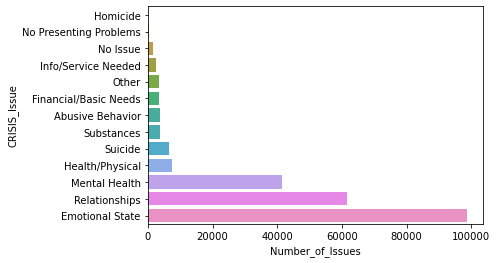

In [184]:
# Barh is gonna be flipped between plt and sns when using the same df
sns.barplot(x = issue_count_df.Number_of_Issues,
            y = issue_count_df.CRISIS_Issue,
            data = issue_count_df);

In [121]:
# Rob: Use Seaborn to get column values
# ax.bar_label(ax.containers[0], fmt = '%d', 
#              padding=2, 
#               label_type='edge', 
#               color='black', 
#               fontweight='bold'
#             )